# Imports

In [1]:
using EpistemicNetworkAnalysis

┌ Info: Precompiling EpistemicNetworkAnalysis [c00a38d3-3ee6-47f0-934a-5622ac45083d]
└ @ Base loading.jl:1342
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fa

# Load and Prepare Data

In [2]:
data = ena_dataset("transitions.data")
derivedAnyCode!(data, :BODY, :Changes, :Mood, :Oily, :Dysphoria, :Cry)
derivedAnyCode!(data, :REFLECT, :Identity, :Longing, :Dream, :Childhood, :Family, :Name, :Letter, :Doubt, :Religion)
derivedAnyCode!(data, :LEARN, :WWW, :Experiment, :Recipe)
derivedAnyCode!(data, :PROGRESS, :Strangers, :Passed, :Out, :Affirmation)

337-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 1.0
 1.0
 0.0
 1.0
 0.0
 0.0
 1.0
 1.0
 0.0
 0.0
 0.0
 1.0

# Nonlinear ENA Model

In [18]:
codes = [
    :BODY,
    :REFLECT,
    :LEARN,
    :PROGRESS,
    :DoseTracking,
    :SkippedDose,
    :Happy,
    :NonHappy,
    :Sweets,
]

conversations = [:Day]
units = [:Day]
continuous = [:Day]

rotation = EpistemicNetworkAnalysis.UMAPRotation(randomState=4321)

myENA = NonlinearENAModel(
    data, codes, conversations, units,
    continuous=continuous,
    # continuous=Symbol[],
    sphereNormalize=true,
    dropEmpty=true,
    rotateBy=rotation
)

display(myENA)

Units (plotted points):
246×40 DataFrame
 Row │ ENA_UNIT  pos_x        pos_y       BODY_Happy  SkippedDose_Sweets  LEAR ⋯
     │ String    Float64      Float64     Real        Real                Real ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 0          0.778041    -0.365173     0.0                 0.0            ⋯
   2 │ 1          2.20901      0.132212     0.57735             0.0
   3 │ 2          1.07431      0.665428     0.0                 0.0
   4 │ 3          1.17796      0.633571     0.0                 0.0
   5 │ 4          0.799134     0.470542     0.0                 0.0            ⋯
   6 │ 5          1.92411      0.417452     0.316228            0.0
   7 │ 6          1.13441      0.853826     0.0                 0.0
   8 │ 7          1.48671      2.53614      0.408248            0.0
   9 │ 8          0.530888     0.0521864    0.0                 0.0            ⋯
  10 │ 9         -0.046211     2.56498      0.0                 0

# Plotting

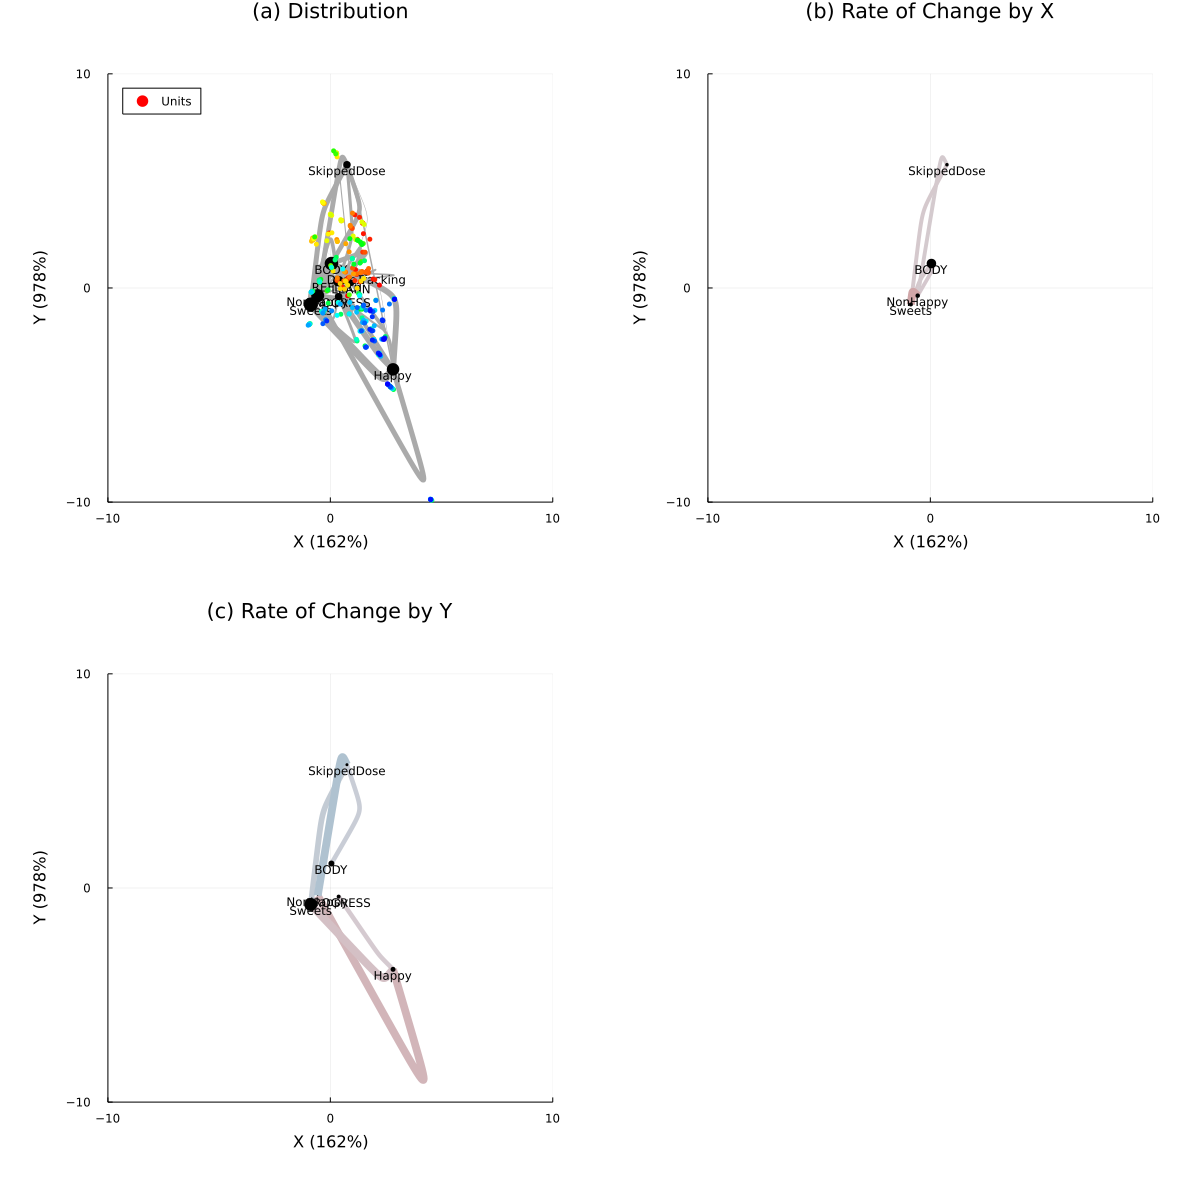

┌ Warning: Indices Base.OneTo(9) of attribute `markersize` does not match data indices 1:4.
└ @ Plots /srv/julia/pkg/packages/Plots/1RWWg/src/utils.jl:132
┌ Warning: Indices Base.OneTo(9) of attribute `markersize` does not match data indices 1:4.
└ @ Plots /srv/julia/pkg/packages/Plots/1RWWg/src/utils.jl:132
┌ Warning: Indices Base.OneTo(9) of attribute `markersize` does not match data indices 1:6.
└ @ Plots /srv/julia/pkg/packages/Plots/1RWWg/src/utils.jl:132
┌ Warning: Indices Base.OneTo(9) of attribute `markersize` does not match data indices 1:6.
└ @ Plots /srv/julia/pkg/packages/Plots/1RWWg/src/utils.jl:132


In [19]:
p = plot(myENA, showWarps=true, lims=10, weakLinks=false, spectralColorBy=:Day)
display(p)